In [ ]:
import plotly.express as px
import pandas as pd

def skip_rows(index):
    return index % 20 != 0

# Load your dataset, skipping rows
df2023 = pd.read_csv('2023.prcp.us.csv', header=None, skiprows=lambda x: skip_rows(x))
df2022= pd.read_csv('2022.prcp.us.csv', header=None, skiprows=lambda x: skip_rows(x))
df=pd.concat([df2022,df2023.iloc[:,1:13]],axis=1)
df.columns = ['Latitude', 'Longitude'] + [f'Month_{i}' for i in range(1, 25)]

# Convert the dataset to long format for easier plotting with Plotly
df_long = df.melt(id_vars=['Latitude', 'Longitude'], var_name='Month', value_name='Precipitation')

# Create the interactive map
fig = px.scatter_geo(df_long,
                     lat='Latitude',
                     lon='Longitude',
                     color='Precipitation',
                     animation_frame='Month',
                     #scope='usa',  # Focus the map on the United States
                     projection="natural earth",
                     title="US 2023 Monthly Precipitation")

fig.update_geos(
    lataxis_range=[24.52, 49.38],  # Latitude range
    lonaxis_range=[-124.77, -66.95]  # Longitude range
)

fig.show()

In [2]:
import pandas as pd

# Load your datasets
# Replace 'your_actual_dataset.csv' and 'your_average_dataset.csv' with the actual file paths
df_actual_2022 = pd.read_csv('2022.prcp.us.csv', header=None, skiprows=lambda x: x % 20 != 0)
df_actual_2023 = pd.read_csv('2023.prcp.us.csv', header=None, skiprows=lambda x: x % 20 != 0)
df_average = pd.read_csv('us_prcp_1901-2000_normal.csv', header=None, skiprows=lambda x: x % 20 != 0)

# Assuming the first two columns are latitude and longitude, and the rest are the monthly values
# Ensure that both DataFrames have the same structure
df_actual_2022.columns = ['Latitude', 'Longitude'] + [f'Month_{i}' for i in range(1, 13)]
df_actual_2023.columns = ['Latitude', 'Longitude'] + [f'Month_{i}' for i in range(1, 13)]
df_average.columns = ['Latitude', 'Longitude'] + [f'Month_{i}' for i in range(1, 13)]

# Calculate the anomaly (actual - average)
df_anomaly_2022 = df_actual_2022.copy()
df_anomaly_2023 = df_actual_2023.copy()
df_anomaly_2022.iloc[:, 2:] = df_actual_2022.iloc[:, 2:] - df_average.iloc[:, 2:]*25.4
df_anomaly_2023.iloc[:, 2:] = df_actual_2023.iloc[:, 2:] - df_average.iloc[:, 2:]*25.4

# Convert the anomaly dataset to long format for easier plotting with Plotly
df_long_anomaly = df_anomaly_2022.melt(id_vars=['Latitude', 'Longitude'], var_name='Month', value_name='Anomaly')

# Rest of your processing and visualization code...


In [ ]:
custom_color_scale = [
    (0.0, "red"),            # Red for the lowest values
    #(0.19, "red"),           # Transition start from red to gray
    (0.3, "lightgray"),      # Light gray at 20th percentile
    (0.4, "gray"),           # Gray in the middle
    (0.6, "gray"),           # Gray in the middle
    (0.7, "lightgray"),      # Light gray at 80th percentile
    #(0.81, "blue"),          # Transition start from gray to blue
    (1.0, "blue")            # Blue for the highest values
]

# Create the interactive map with the custom color scale
figA = px.scatter_geo(df_long_anomaly,
                     lat='Latitude',
                     lon='Longitude',
                     color='Anomaly',
                     animation_frame='Month',
                     projection="natural earth",
                     color_continuous_scale=custom_color_scale,
                     title="US 2023 Monthly Precipitation Anomaly")

figA.update_geos(
    lataxis_range=[24.52, 49.38],  # Latitude range
    lonaxis_range=[-124.77, -66.95]  # Longitude range
)

figA.show()

In [4]:
import numpy as np

In [5]:
grid=0.2
mat=np.zeros(shape=(24,int((49.38-24.52)/grid)+1,int((-66.95+124.77)/grid)+1))#month,lat,lon
for ind,e in df_anomaly_2022.iterrows():
    for j in range(1,13):
        #print(e['Latitude'],e['Longitude'])
        mat[j-1][int((e['Latitude']-24.52)/grid)][int((e['Longitude']+124.77)/grid)]=min(mat[j-1][int((e['Latitude']-24.52)/grid)][int((e['Longitude']+124.77)/grid)],e[1+j])

for ind,e in df_anomaly_2023.iterrows():
    for j in range(1,13):
        #print(e['Latitude'],e['Longitude'])
        mat[j-1+12][int((e['Latitude']-24.52)/grid)][int((e['Longitude']+124.77)/grid)]=min(mat[j-1][int((e['Latitude']-24.52)/grid)][int((e['Longitude']+124.77)/grid)],e[1+j])

C:\Users\KelM\AppData\Local\Temp\ipykernel_80816\318691955.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\KelM\AppData\Local\Temp\ipykernel_80816\318691955.py:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [6]:
mat.shape

(24, 125, 290)

In [7]:
np.count_nonzero(mat[3])

15317

In [8]:
from pytrends.request import TrendReq
from datetime import datetime

pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["climate change"]

# Set the start date to the beginning of 2023 and the end date to today (or the last date in 2023 you're interested in)
start_date = "2022-01-01"
end_date = "2023-12-31"
#end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date in YYYY-MM-DD format; adjust as needed

# Build the payload with the adjusted timeframe
pytrends.build_payload(kw_list, cat=0, timeframe=f'{start_date} {end_date}', geo='US', gprop='')

# Interest over time
interest_over_time_df = pytrends.interest_over_time()
print(interest_over_time_df)


            climate change  isPartial
date                                 
2022-01-02               2      False
2022-01-09               2      False
2022-01-16               1      False
2022-01-23               2      False
2022-01-30               2      False
...                    ...        ...
2023-12-03               3      False
2023-12-10               3      False
2023-12-17               1      False
2023-12-24               1      False
2023-12-31               1      False

[105 rows x 2 columns]


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime

GTbyMonth = np.zeros(24)
for m in range(1, 13):
    # Generate the start and end date for each month
    start_date = datetime(2022, m, 1)
    end_date = pd.date_range(start_date, periods=1, freq='M').date[0]  # 'M' frequency stands for month end

    # Use the generated start and end dates to filter the DataFrame
    Monthlydf = interest_over_time_df.loc[start_date:end_date]

    # Sum the values for the month and assign to the corresponding position in GTbyMonth
    GTbyMonth[m-1] = int(Monthlydf['climate change'].sum())  # Adjusted index to m-1 since Python is zero-indexed

for m in range(1, 13):
    # Generate the start and end date for each month
    start_date = datetime(2023, m, 1)
    end_date = pd.date_range(start_date, periods=1, freq='M').date[0]  # 'M' frequency stands for month end

    # Use the generated start and end dates to filter the DataFrame
    Monthlydf = interest_over_time_df.loc[start_date:end_date]

    # Sum the values for the month and assign to the corresponding position in GTbyMonth
    GTbyMonth[m-1+12] = int(Monthlydf['climate change'].sum())  # Adjusted index to m-1 since Python is zero-indexed

print(GTbyMonth)


[  9.   8.   9. 114.  17.   6.   9.   8.  11.  15.  12.   9.  10.  11.
  12.  55.  12.   5.   9.   8.  12.  12.  10.   9.]


C:\Users\KelM\AppData\Local\Temp\ipykernel_80816\270479705.py:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\KelM\AppData\Local\Temp\ipykernel_80816\270479705.py:20: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Corrected input shape to match the provided data
spatial_input = Input(shape=(mat.shape[1],mat.shape[2], 1))  # Shape adjusted to (height, width, channels)

# Example CNN architecture
conv1 = Conv2D(32, (3, 3), activation='relu')(spatial_input)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
flat = Flatten()(pool2)
dense1 = Dense(128, activation='relu')(flat)
output = Dense(1, activation='linear')(dense1)  # Assuming a regression task

# Create the model with the corrected input shape
model = Model(inputs=spatial_input, outputs=output)

# Model summary to verify the input shape
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 125, 290, 1)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 288, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 144, 32)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 142, 64)       18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 71, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 131776)            0   

In [18]:
import tensorflow as tf

def weighted_mse(y_true, y_pred):
    #weights = tf.where(y_true > 3, 1, 0.2)  # Adjust 'threshold', 'higher_weight', and 'lower_weight' based on your dataset
    return tf.reduce_mean(tf.multiply(1, abs(tf.cube(y_true - y_pred))))

X=mat
X_normalized = (X - X.min()) / (X.max() - X.min())
X_reshaped = X_normalized[..., np.newaxis]
model.compile(optimizer='adam', loss='mse') 

In [19]:
import numpy as np

# Assuming 'arr' is your original ndarray of shape (24, 125, 290, 1)
arr = X_reshaped

# Indices to remove (3rd and 15th elements along the first axis, which are indices 2 and 14 in 0-based indexing)
indices_to_remove = [3,15]

# Use np.delete to drop these indices along the first axis (axis=0)
new_arr = np.delete(arr, indices_to_remove, axis=0)

# 'new_arr' now has the shape (22, 125, 290, 1), with the 3rd and 15th elements along the first axis removed
y_train=np.array([GTbyMonth[i] for i in range(len(GTbyMonth)) if i%12!=3])

In [20]:
# Assuming X_spatial and X_temporal are your prepared spatial and temporal features, and y are your target labels
model.fit(x=np.delete(arr, indices_to_remove, axis=0),y=y_train, batch_size=3, epochs=60, validation_split=0.2)

Epoch 1/60
6/6 [==============================] - 1s 103ms/step - loss: 68.5187 - val_loss: 4.4912
Epoch 2/60
6/6 [==============================] - 0s 19ms/step - loss: 26.1502 - val_loss: 18.6928
Epoch 3/60
6/6 [==============================] - 0s 18ms/step - loss: 29.1866 - val_loss: 2.7880
Epoch 4/60
6/6 [==============================] - 0s 18ms/step - loss: 19.6904 - val_loss: 2.2399
Epoch 5/60
6/6 [==============================] - 0s 18ms/step - loss: 15.4834 - val_loss: 9.9029
Epoch 6/60
6/6 [==============================] - 0s 18ms/step - loss: 13.0162 - val_loss: 7.4745
Epoch 7/60
6/6 [==============================] - 0s 18ms/step - loss: 10.2276 - val_loss: 4.6012
Epoch 8/60
6/6 [==============================] - 0s 19ms/step - loss: 9.8090 - val_loss: 2.2145
Epoch 9/60
6/6 [==============================] - 0s 18ms/step - loss: 9.9346 - val_loss: 4.0186
Epoch 10/60
6/6 [==============================] - 0s 18ms/step - loss: 12.5179 - val_loss: 7.4317
Epoch 11/60
6/6 [==

In [21]:
predY=model.predict(new_arr)

1/1 [==============================] - 0s 56ms/step


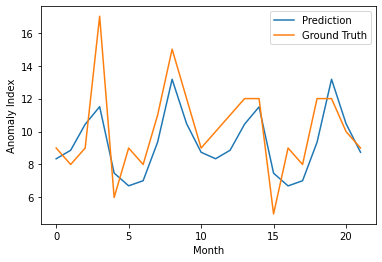

In [22]:
import matplotlib.pyplot as plt
plt.plot(predY)
plt.plot(y_train)
plt.xlabel("Month")
plt.ylabel("Anomaly Index")
plt.legend(["Prediction", "Ground Truth"])

1/1 [==============================] - 0s 44ms/step


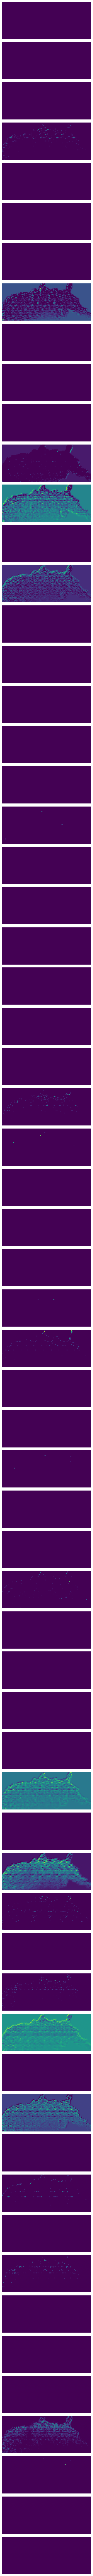

In [24]:
from tensorflow.keras.models import Model

layer_outputs = model.get_layer("conv2d_3").output

# Create a new model that will return these outputs, given the model input
activation_model = Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(new_arr[0:1])

first_layer_activation = activations[0]
num_feature_maps = first_layer_activation.shape[-1]

# Create a figure with subplots in a single column
fig, axes = plt.subplots(nrows=num_feature_maps, ncols=1, figsize=(15, num_feature_maps * 2))  # Adjust figsize as needed

if num_feature_maps == 1:
    # If there's only one feature map, 'axes' will not be an array, so we wrap it in a list for consistency
    axes = [axes]

for i, ax in enumerate(axes):
    # Post-process the feature to make it visually palatable
    feature_map = first_layer_activation[..., i]
    ax.imshow(feature_map, cmap='viridis')
    ax.axis('off')

plt.tight_layout()  # This will adjust spacing between plots to minimize overlap
plt.show()

